Grids in AMUSE have a similar functionality as particle sets, but grids are inmutable in the number of grid points in any direction. You cannot add a gridpoint like you add a particle in a particle set, instead you define the number of points in each direction on creation of the grid and amuse will create the grid points.

In [1]:
from amuse.lab import *

Let's start by creating a simple 3 by 4 grid.

In [2]:
grid = Grid(3,4)
print grid

RegularGrid (3 x 4) ()


A grid created in this way does not define any positions for the gridpoints, you can make a more useful grid with the ``create`` function. The ``create`` function needs a list of the number of points in each direction and the total distance covered by the grid in each direction. The created grid will cover the space from 0 to the given total distance in any direction

In [6]:
grid = Grid.create((3,4),(1|units.m, 2|units.m))
print grid
print grid.x

Grid.create deprecated, use new_regular_grid instead
RegularGrid (3 x 4) (x, y)
[[0.166666666667, 0.166666666667, 0.166666666667, 0.166666666667], [0.5, 0.5, 0.5, 0.5], [0.833333333333, 0.833333333333, 0.833333333333, 0.833333333333]] m


The returned positions are the centers of the gridpoints, we can make a small plot to show where the grid centers are positioned.

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt

Grid.create deprecated, use new_regular_grid instead


<IPython.core.display.Javascript object>


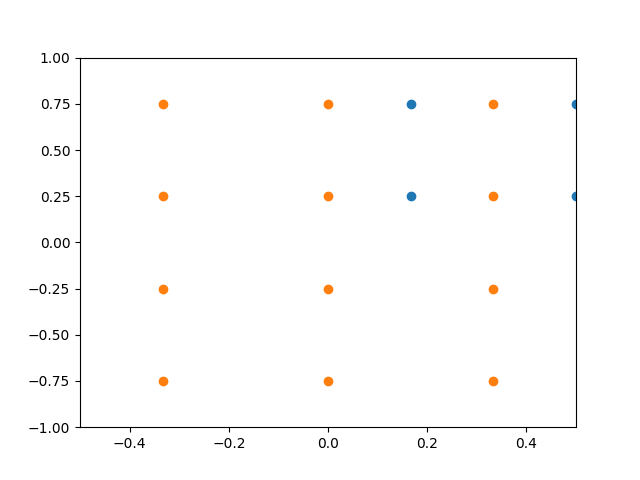

(0, 2)

In [21]:
grid = Grid.create((3,4),(1|units.m, 2|units.m))
plt.scatter(
    grid.x.value_in(units.m),
    grid.y.value_in(units.m)
)
plt.xlim(0,1)
plt.ylim(0,2)

You can index a grid in two ways, direct indexing on the grid or indexing on an attribute. Direct indexing on a grid can be more efficient as no data is retrieved until you actually requenst an attribute. If you first request an attribute and then do the indexing, all data for the attribute is retrieved and returned first as a vector quantity (or numpy array), next a subselection is made using the indexing routines. Both method should return the same quantities.

In [22]:
print grid.position[0][0]
print grid[0][0].position

[0.166666666667, 0.25] m
[0.166666666667, 0.25] m


Grids can be moved around if needed

<IPython.core.display.Javascript object>


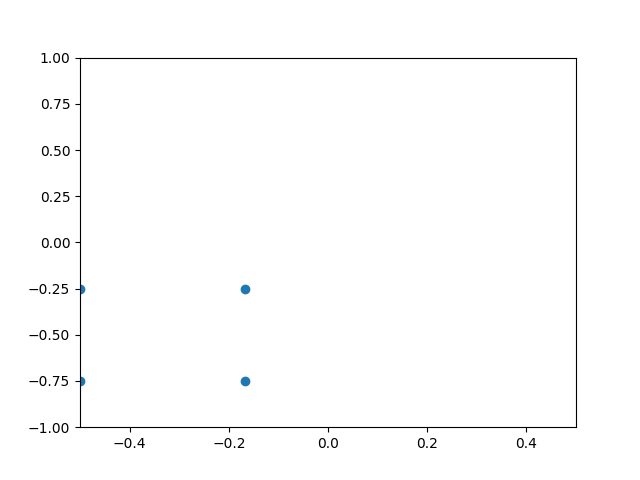

(-1, 1)

In [24]:
grid.position -= [0.5,1.0] | units.m
plt.scatter(
    grid.x.value_in(units.m),
    grid.y.value_in(units.m)
)
plt.xlim(-0.5,0.5)
plt.ylim(-1,1)